In [8]:
library(dplyr)
library(ggplot2)

In [15]:
url_dataset = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
col_name = c('sex', 'length', 'diameter', 'height', 'whole_weight',
            'shucked_weight', 'viscera_weight', 'shell_weight', 'rings')
PATH <- "../datasets/Telecom Churn Dataset/churn-bigml-80.csv"
df <- read.csv(url_dataset, sep = ",", header = F, col.names = col_name)
head(df)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [16]:
colnames(df)
head(df)

[1] "sex"            "length"         "diameter"       "height"        
[5] "whole_weight"   "shucked_weight" "viscera_weight" "shell_weight"  
[9] "rings"

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


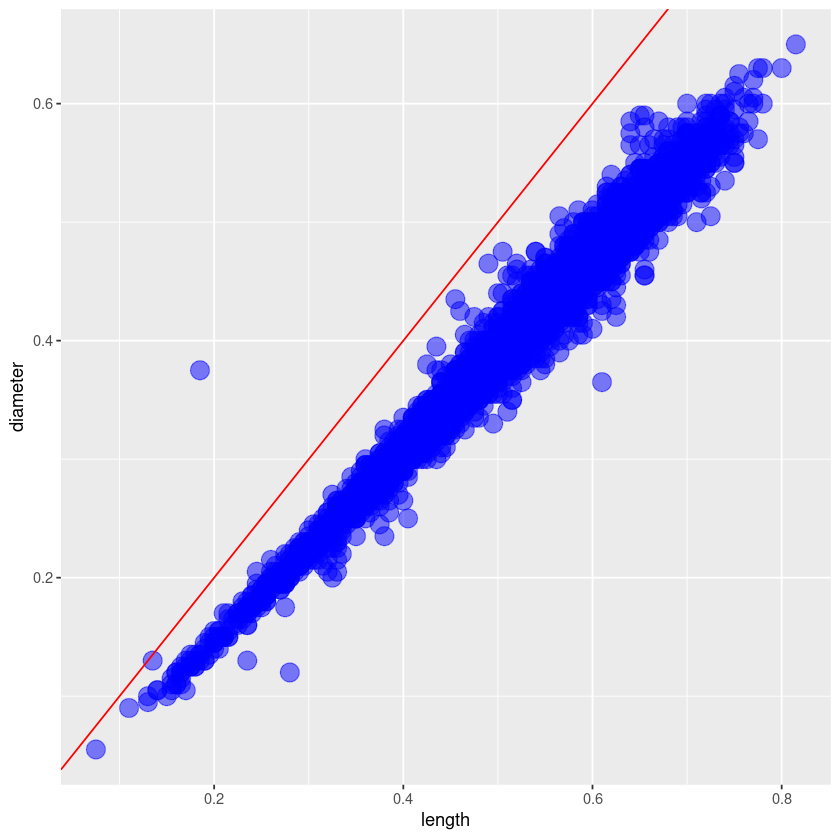

In [17]:
df %>% 
    ggplot(aes(x = length, y = diameter)) +
        geom_point(alpha=0.5, color='blue', size=5) + 
        geom_abline(color='red', )
        

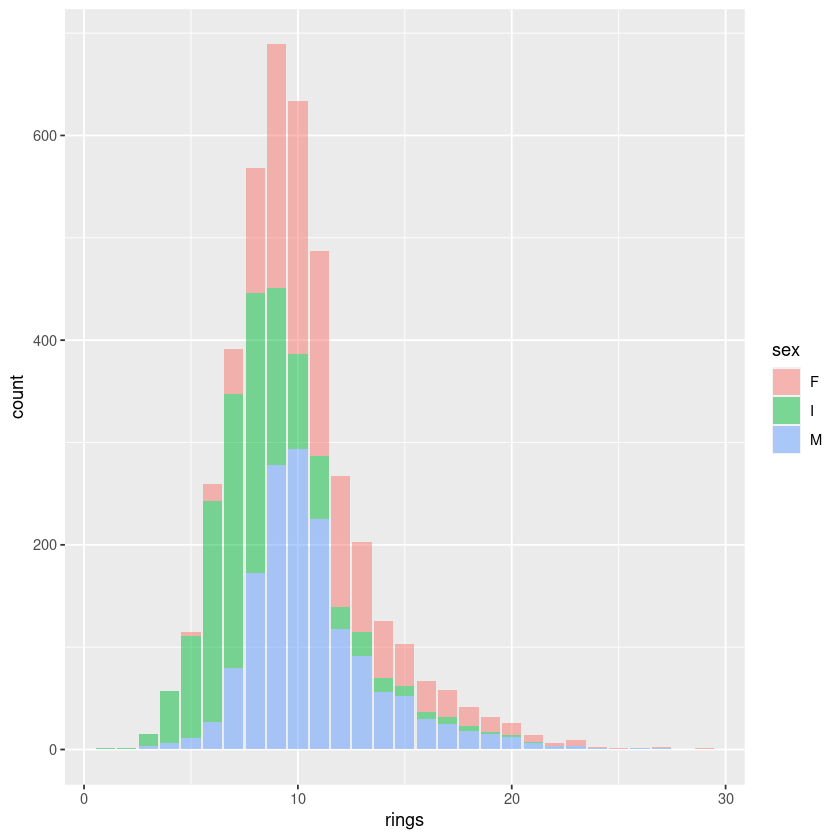

In [20]:
ggplot(df, aes(rings, fill=sex)) + 
  geom_bar(alpha=0.5)

`summarise()` regrouping output by 'rings' (override with `.groups` argument)



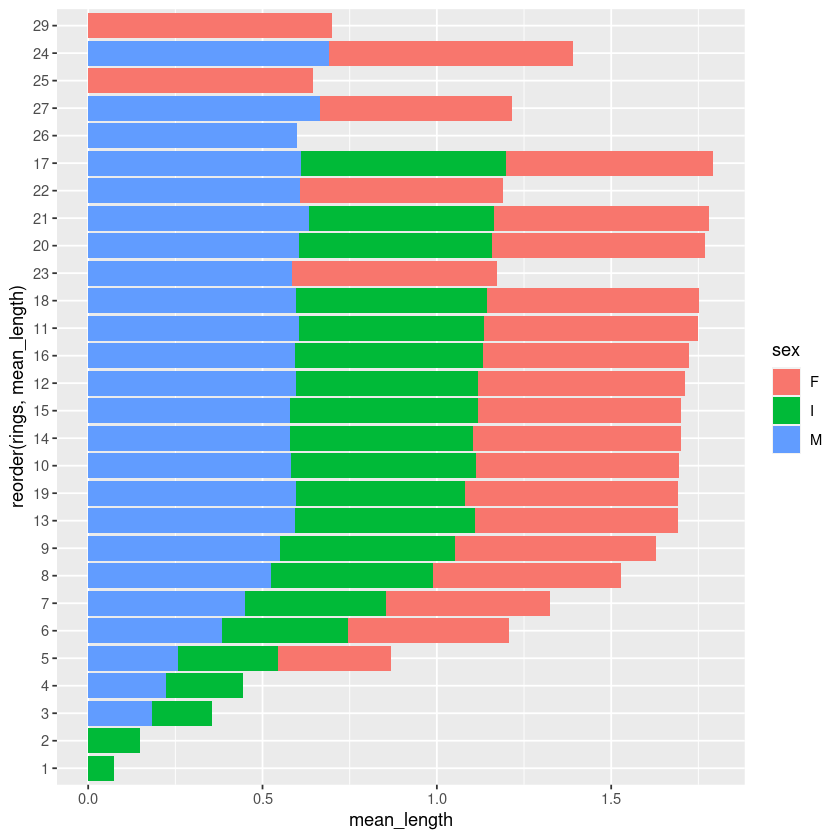

In [29]:
df %>% 
    group_by(rings, sex) %>% 
    summarize(mean_length = mean(length)) %>% 
    ggplot(aes(x=reorder(rings, mean_length), y=mean_length, fill=sex))+
        geom_col()+
        coord_flip()

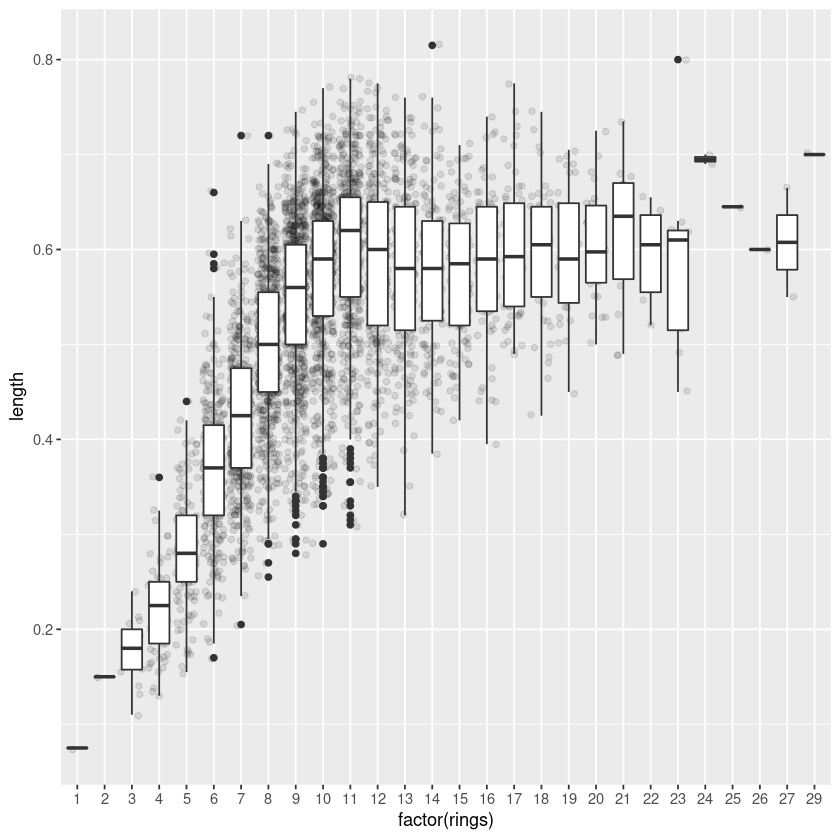

In [44]:
df %>% 
    ggplot(aes(x=factor(rings), y=length))+
        geom_jitter(alpha=0.1)+
        geom_boxplot()

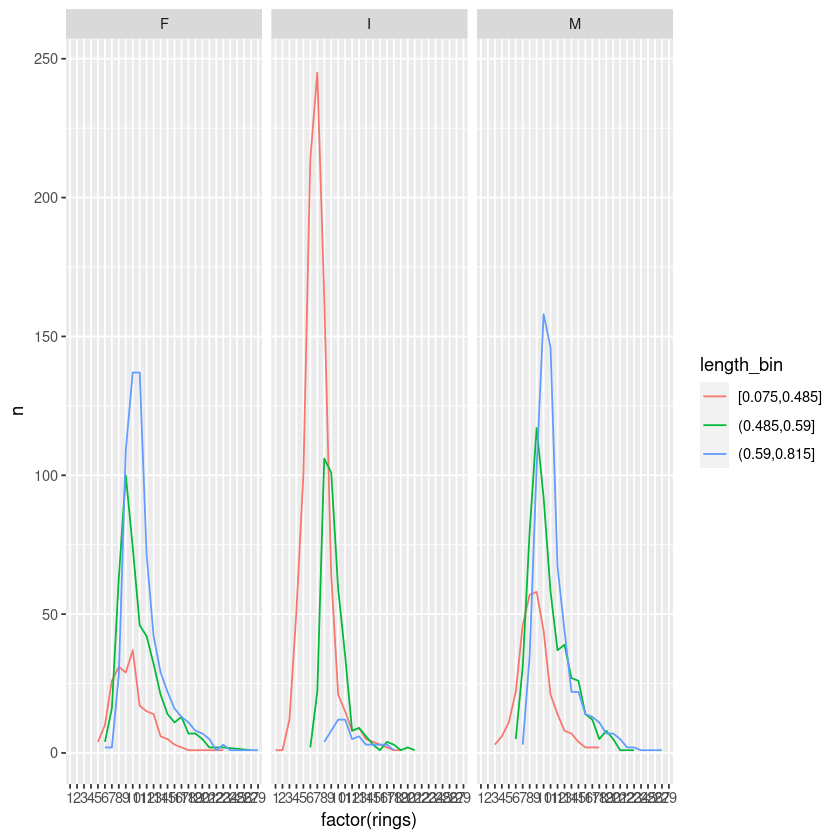

In [59]:
df %>% 
    mutate(length_bin = cut_number(length, 3)) %>% 
    count(rings, sex, length_bin) %>% 
    ggplot(aes(x=factor(rings), y=n, group=length_bin, color=length_bin))+
        geom_line() + facet_wrap(~sex)

ref
- https://cengel.github.io/R-data-wrangling/data-visualization-with-ggplot2.html